In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import sys
import warnings
import timeit
import numpy as np
import scipy.optimize
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()
from shapely.geometry import LineString
from scipy.interpolate import UnivariateSpline
G=const.G.cgs.value
c=const.c.cgs.value
MSUN=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
KM=10**5
import math

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

plt.close()

error: (m>k) failed for hidden m: fpcurf0:m=3

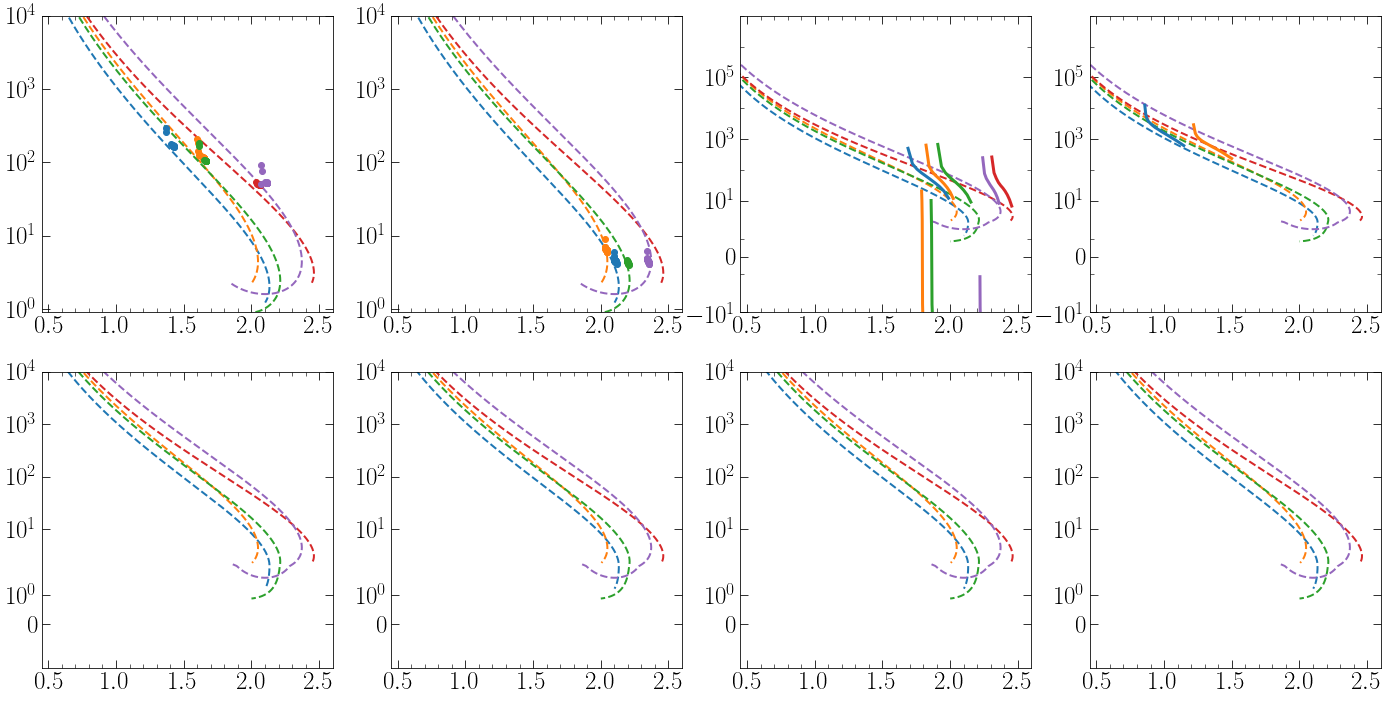

In [2]:
fig, axs = plt.subplots(2, 4,figsize=(24,12))
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

for i in range(2):
    for j in range(4):
        for k in range(5):
            grdata1=np.genfromtxt('TOV_tidal_v1_data'+str(k+1)+'.txt')
            a10, a11, a12, a13, a14 = grdata1[:, 0], grdata1[:, 1], grdata1[:, 2], grdata1[:, 3], grdata1[:, 4]
            axs[i,j].plot(a11/Ms,a13,color=colorset[k],linestyle='--',linewidth=2)
#             axs[i,j].set_ylim(0.9,10000)
            axs[i,j].set_xlim(0.45,2.6)
            axs[i,j].set_ylim(-1.5,10**4)
            axs[i,j].set_yscale('symlog')
            axs[i,j].minorticks_on()


# the first plot
for i in range(5):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data2'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN 
    y21 = c921 
    axs[0,0].semilogy(x21, y21, 'o', color = colorset[i]) 
    axs[0,0].set_ylim(0.9,10**4)
    axs[0,0].set_yticks([1,10,100,1000,10000])
    
# the second plot
list2=[26,27,28,30]
for i in range(4):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN 
    y21 = c921 
    if list2[i]!=30:
        axs[0,1].semilogy(x21, y21, 'o', color = colorset[i])   
    else:
        axs[0,1].semilogy(x21, y21, 'o', color = colorset[i+1])
        
    axs[0,1].set_ylim(0.9,10**4)
    axs[0,1].set_yticks([1,10,100,1000,10000])
    
n1=np.array([17, 17, 18, 16, 14])    
# the third plot
for i in range(5):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data3'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN 
    y21 = c921 
    
    x1=x21[0:n1[i]]
    y1=y21[0:n1[i]]
    index=x1.argsort()
    ydata=y1[index]
    xdata=x1[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=3) 
    
    x2=x21[n1[i]+1:-1]
    y2=y21[n1[i]+1:-1]
    index=x2.argsort()
    ydata=y2[index]
    xdata=x2[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=3) 
    axs[0,2].set_ylim(-10,10**7)
    axs[0,2].set_yscale('symlog')
    axs[0,2].set_yticks([-10,0, 10,1000,100000])

n2=np.array([18, 14, 9, 16, 13]) 
# the fourth plot
for i in range(5):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+36)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN
    y21 = c921
    x1=x21[0:n2[i]]
    y1=y21[0:n2[i]]
#     index=x1.argsort()
#     ydata=y1[index]
#     xdata=x1[index]
#     s1 = UnivariateSpline(xdata, ydata, s=5)
#     xs=np.linspace(min(xdata),max(xdata),10)
#     ys=s1(xs)
    axs[0,3].plot(x1, y1, color = colorset[i],linewidth=3) 
    
    x2=x21[n2[i]+1:-1]
    y2=y21[n2[i]+1:-1]
    index=x2.argsort()
    ydata=y2[index]
    xdata=x2[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,3].plot(xs, ys, color = colorset[i],linewidth=3) 
    axs[0,3].set_ylim(-10,10**7)
    axs[0,3].set_yscale('symlog')
    axs[0,3].set_yticks([-10,0, 10,1000,100000])

# the fifth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 
    axs[1,0].semilogy(x1, y1, 'o', color = colorset[i]) 
    axs[1,0].set_ylim(0.9,10**4)
    axs[1,0].set_yticks([1,10,100,1000,10000])
    
# the sixth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+6)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 
    axs[1,1].semilogy(x1, y1, 'o', color = colorset[i]) 
    axs[1,1].set_ylim(0.9,10**4)
    axs[1,1].set_yticks([1,10,100,1000,10000])
    
    
# the seventh plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+11)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 
    axs[1,2].semilogy(x1, y1, color = colorset[i],linewidth=3) 
    axs[1,2].set_yticks([1,10,100,1000,10000]) 
    axs[1,2].set_ylim(1,10**5)

    
# the eigth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+16)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 
    axs[1,3].semilogy(x1, y1, color = colorset[i],linewidth=3) 
    axs[1,3].set_yticks([1,100,10000,1000000]) 
    axs[1,3].set_ylim(1,10**7)
    axs[1,3].set_xlim(0.3,2.6)
    
fig.text(0.08, 0.5,r'$\Lambda$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ \rm M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("MOI.pdf", format='pdf', bbox_inches="tight")